<a href="https://colab.research.google.com/github/odesay97/MachineLearing_Class/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
1599
4898
(5197, 3) (1300, 3)
0.7829517029055224
0.7761538461538462
[[ 0.56730858  1.65325259 -0.71278722]] [1.78577187]
0.9978833942659227
0.8646153846153846


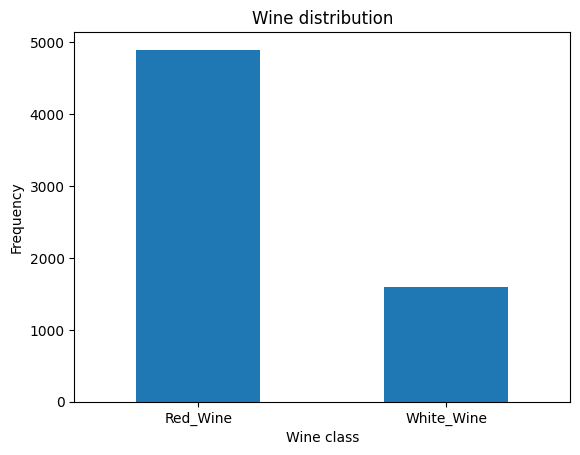

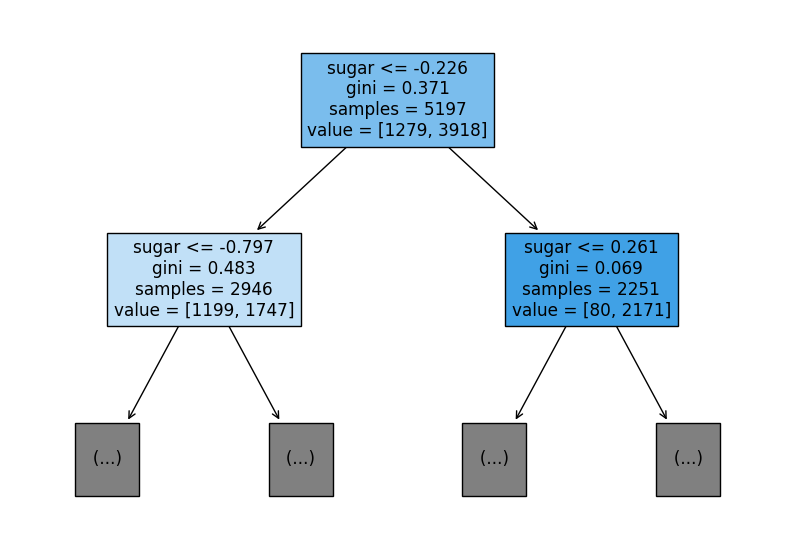

0.8458726188185491
0.8407692307692308


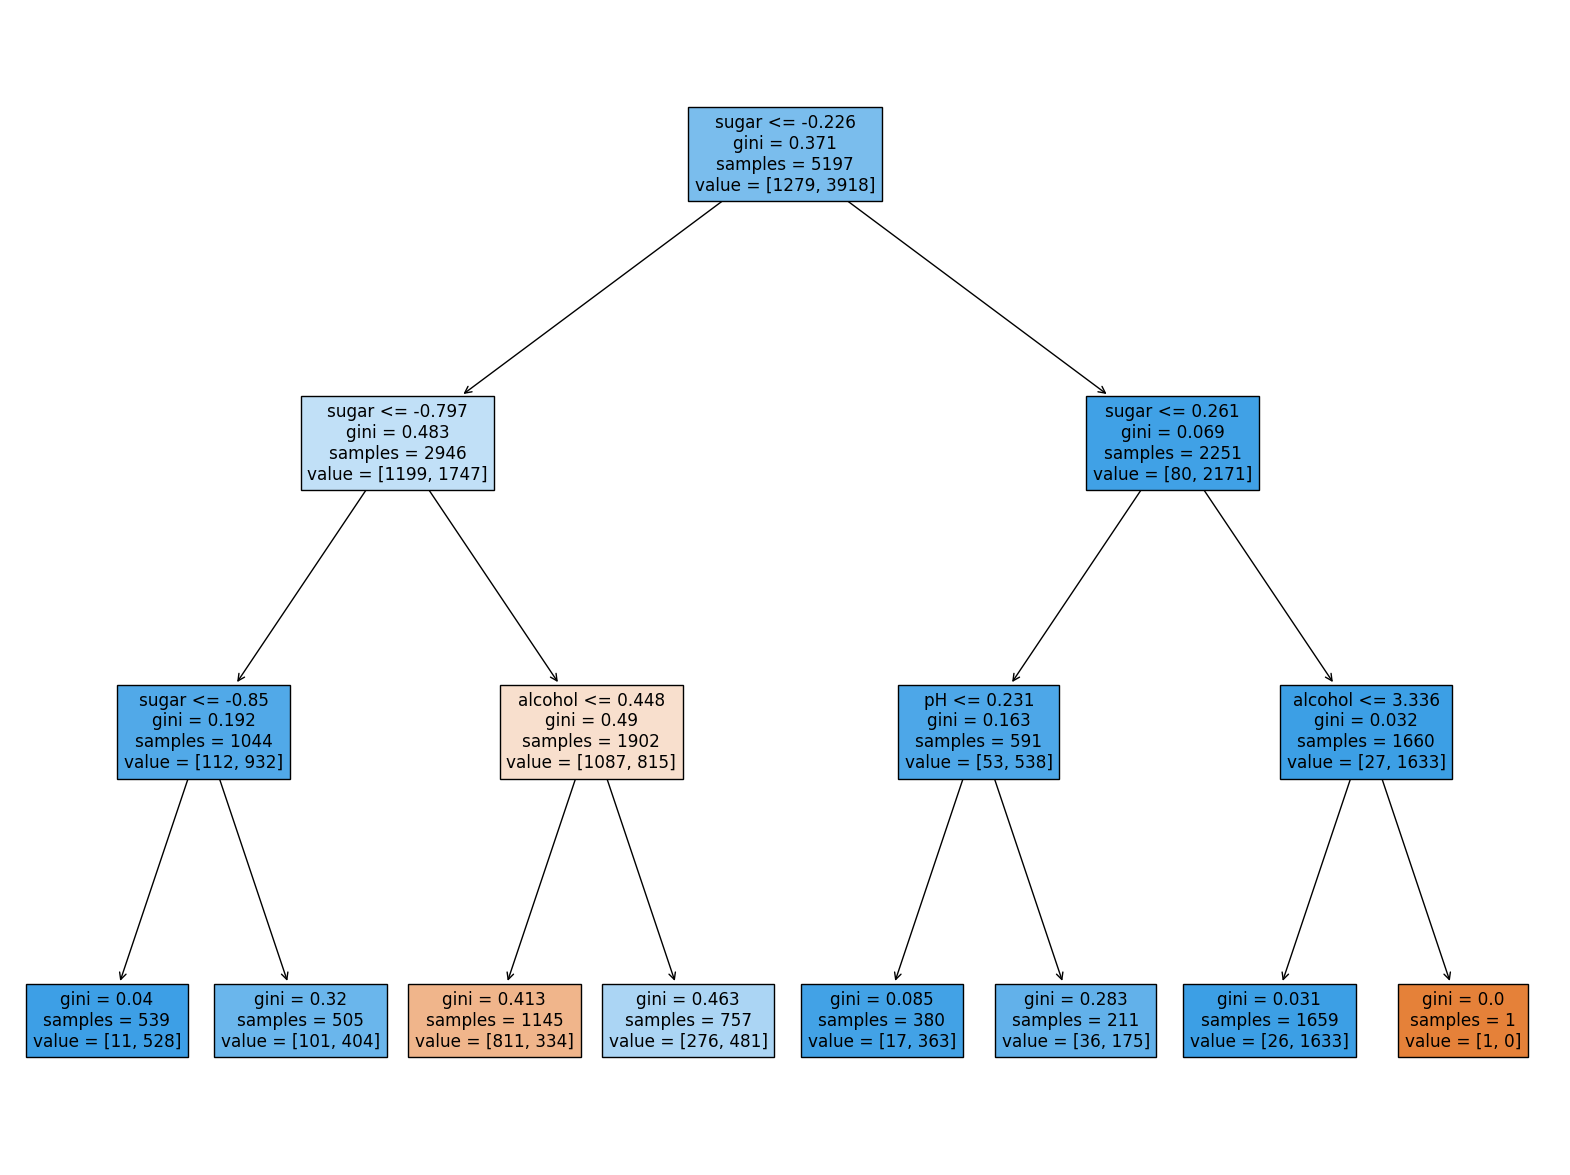

0.8458726188185491
0.8407692307692308


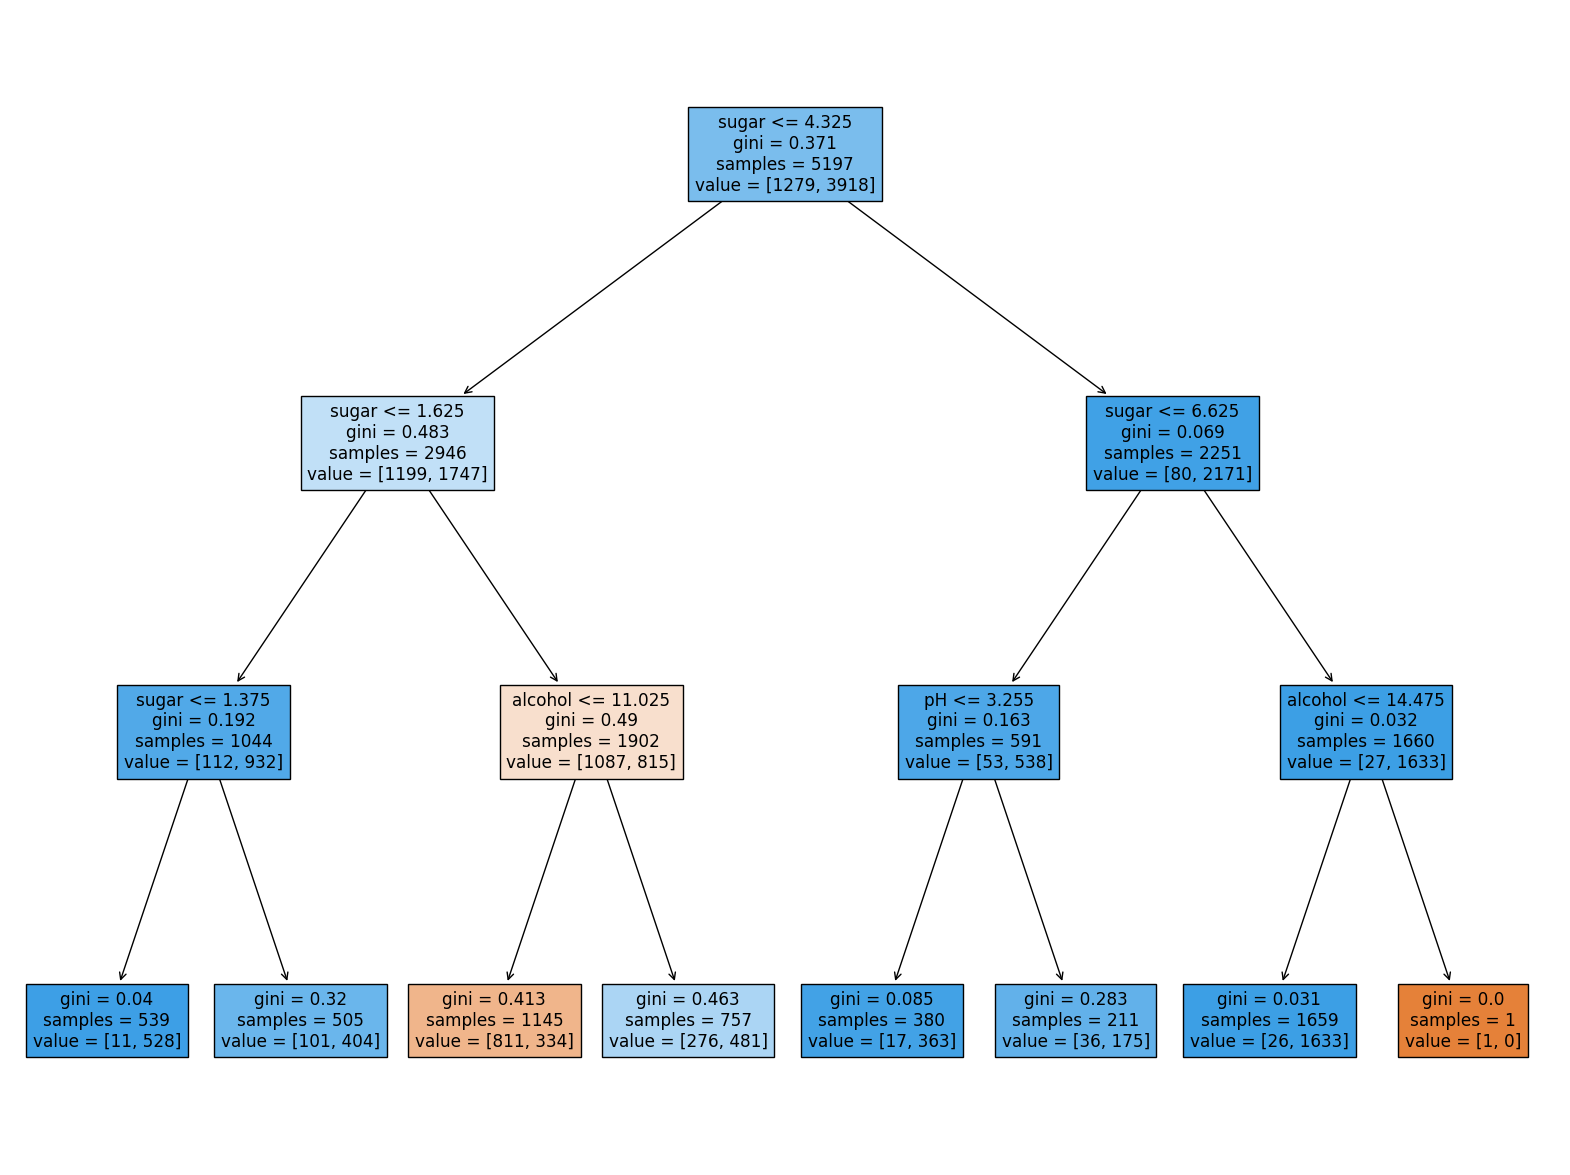

[0.14086835 0.85360568 0.00552597]
0.8404848951318068
0.8269230769230769
[1.]
0.8893592457186839
0.8569230769230769


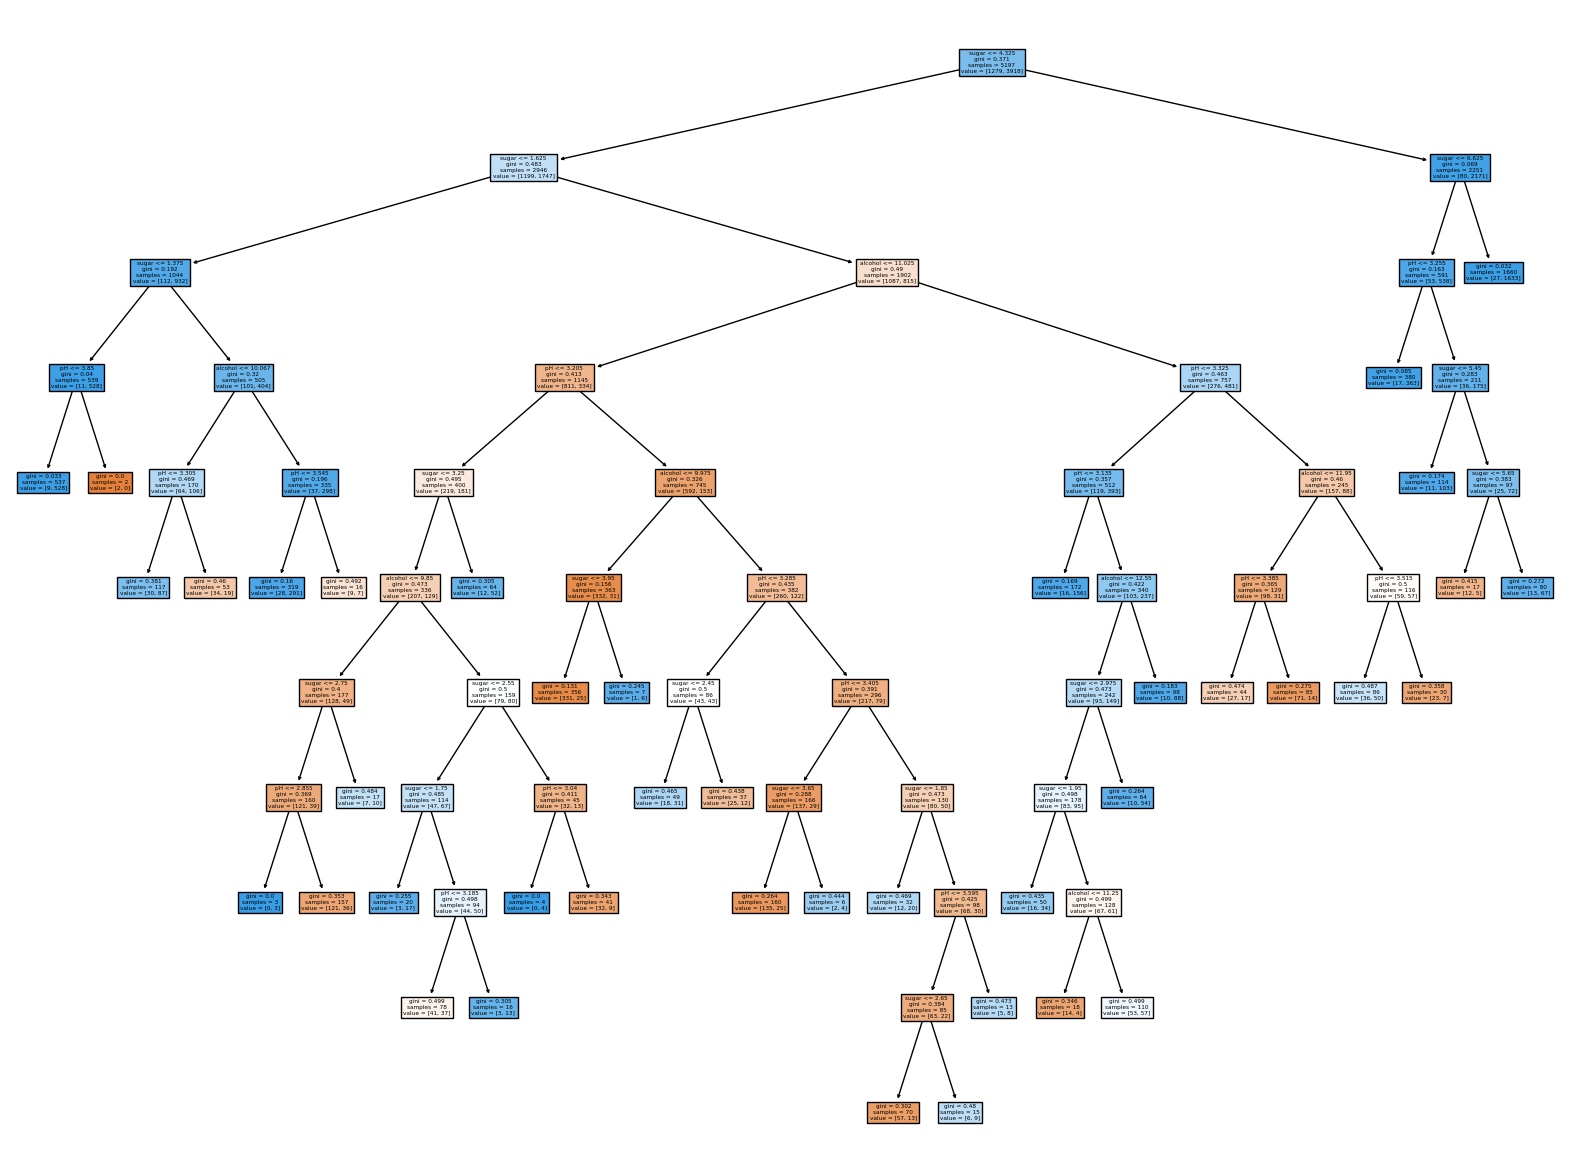

In [14]:
# 데이터가 일부 없다면??
# 해결방법 !
# 1. 평균값을 넣어서 데이터를 해결
# 2. 그냥 없는 샘플 자체를 지워버림

#-----------------------------

# 로지스틱 회귀로 와인분류
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

# 현재 불러온 데이터는 데이터프레임 ( 아직 넘파이 배열로 넘기지 않음 )
# -> 데이터의 현재 형태에 따라 쓸 수 있는 명령어가 달라짐

wine.head()
# 데이터프레임에서의 첫 5개를 출력해줌

wine.info()
# 데이터프레임에서의 각 열의 데이터타입과 누락된 데이터가 있는지 확인

wine.describe()
# 데이터프레임에서의 각 속성의 평균, 최소값, 표준편차 등등을 보여줌( 데이터의 편향성등 데이터 자체에 대한 평가를 내리기 위해서 봄 )

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
print(list(target).count(0))
print(list(target).count(1))

from sklearn.model_selection import train_test_split

# stratify들어간거 체크 -> 타겟 데이터를 바탕으로 데이터 균일화
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, stratify=target, random_state=42)

print(train_input.shape, test_input.shape)

# 왜 훈련데이터로 StandardScaler를 훈련시키고, 훈련데이터와 테스트 데이터를 이 StandardScaler로 학습시킬까?
# 훈련데이터를 기준으로 표준화 시켜야하기 때문
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 막대바로 나타내기
LABELS = ["Red_Wine","White_Wine"]

import matplotlib.pyplot as plt
count_classes = pd.value_counts(wine["class"],sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Wine distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Wine class")
plt.ylabel("Frequency")

#---------------------------
## 설명하기 어려운 모델
print(lr.coef_, lr.intercept_)

# 로지스틱 회귀모델이 왜 이러한 계수와 절편을 학습했는지 이해하기 힘듬
# 아마 알콜 도수와 당도가 높을 수록 화이트 와인일 가능성이 높고 등등 ?? 이유가 추측됨
# -> 그러나 정확히 이 숫자가 어떤 의미인지 설명하기 어려움
# 다항특성을 추가하면 더욱 어려워짐

#-------------------------

# 결정 트리
# 학습결과를 설명하기 쉬운 알고리즘
# 사이킷런의 결정트리 알고리즘은 노드에서 최적을 분할을 찾기 전에 특성의 순서를 섞음으로서 약간의 무작위성이 부여됨
# 결정트리의 경우 과대적합될 확률이 매우 높음

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 전체 트리 출력
# plt.figure(figsize=(10,7))
# plot_tree(dt)
# plt.show()

# 최대 깊이를 1로 지정 + 라벨링(feature_names) + 색넣기(filled -> 0~1 색비율)
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 아래의 계산법이나 이런것은 알고만 있으면됨 ( 지식적으로 )---------------------
# 트리를 보면 알겠지만 조건에 따라 분기되어 내려가게됨
# samples -> 해당 노드에 도달한 샘플 수
# value -> 샘플에서 음성과 양성의 클래스의 수( 노드의 색으로 나타남 -> 양성이 높으면 파랗게 음성이 높으면 하얗게 )
# --> 책에 있음

# 왜 sugar로 구분하는가? 왜 -0.239 기준으로 구분하는가?
# 최대한 데이터가 균일해지도록분할 ...- --> 사진 보셈

# 회귀나무 분할법칙
# 분류나무 분할법칙
    #  --> 사진 볼 것
    # --> 지니불순도
    # 지니불순도 = 1 - (음성클래스비율^2 + 양성클래스비율^2)
      #=> 지니불순도는 0이 될수록 순수하고( 구분하기 쉽다( 좋다 ) ), 1에 가까울수록 불순물이 많다( 구분하기 어렵다( 안좋다 )) )
      # => 엔트로피 불순도 = -~~ 사진, 책

# 정보이득 !
  # 부모노드와 자식노드의 불순도 차이
  # 결정트리모델은 정보이득을 가능한 크도록 트리를 생장시ㅣㅁ
  # 정보이득 = 부모듸 불순도 -(왼쪽 노드 샘플 수/ )~~ 사진볼것

# -----------------------------------------------

# 이 부분부터는 중요함 ( 규제 )
# 규제방법 - 가지치기
# 1. max_depth
# 가장 간단한 규제 방법으로써 트리의 최대 깊이를 지정하는것
# 과대 및 과소 적합을 보정

# 사실 이 시점에서 트리에 사용되는 데이터는 정규화할 필요 없음 -> 왜? 여러 특성중 하나를 골라서 그것을 바탕으로 나누기 때문
# ( 즉, 특성간의 데이터 값 차이에 의한 괴리가 발생하지 않음 )
# 하지만 만약에
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 특성 중요도
# 결정트리에서 어떤 특성이 가장 유용한지 나타내는 지표
# 특성 중요도를 활용하면 결정트리모델을 특성선택에 활용할 수 있다
# 예를 들어 특성이 1000개 있다면, 그것을 다쓰기보단 괜찮은 특성만 골라쓰고 싶다.
# 그렇다면 어떤 특성을 쓸것인가? -> 특성의 중요도

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 특성의 중요도
print(dt.feature_importances_)
# -> 알코올 농도, 당도, ph ==> [0.14086835 0.85360568 0.00552597]
# 당도가 가장 중요하다고 나왔다.

# ********************* *************************
# 그렇다면 당도만 가지고 학습을 해보자!
data_a = wine[['sugar']].to_numpy()
target_a = wine['class'].to_numpy()


from sklearn.model_selection import train_test_split
train_input_a, test_input_a, train_target_a,test_target_a = train_test_split(data_a,target_a,test_size = 0.2,random_state=42)
# test_size =0.2 --> 훈련데이터와 테스트 데이터를 8:2로 나눠라

dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt.fit(train_input_a,train_target_a)
print(dt.score(train_input_a,train_target_a))
print(dt.score(test_input_a,test_target_a))
# 정확도가 올랐다 -> 즉, 특성이 많다고 해서 꼭 정확도가 높다는 보장은 없다
# 좋은 특성을 사용해야한다.

print(dt.feature_importances_)
# -> [1.]
# 한개의 특성만 가지고 했기 떄문



# 규제 2번쨰 방법
# min_impurity_decrease
# 불순도 조절 -> 불순도가 어느정도 값 이하라면 분할하지 마라
# 가지치기의 일종
# 어떤 노드의 정보이득 * ( 노드의 샘플 수 ) / (전체 샘플수) 값이 이 매개변수보다 작으면 더이상 분할하지 않게 만듦
# 과대적합을 방지하는데 사용될 수 있음

# min_impurity_decrease를 조절 -> => 불순도가 이 이하라면 분할하지 말고 버림
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#------------------------
# 결정트리 정리

# 장점
# 학습결과를 설명하기 쉬운 알고리즘
# 특성값의 스케일은 계싼에 영향을 미치지 않으므로 표준화 전처리가 필요없음
# 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산할 수 있음
# 특성 중요도를 활용하면 결정트리 모델을 특성 선택에 활용할 수 있다는 장점이 있음

# 단점
# 계층적 구조로 인해 중간에 에러가 발생하면 다음 단계로 에러가 계속 전파
# 학습 데이터에 미세한 변동에도 최종결과에 크게 영향을 줌
# 적은 개수의 노이즈에도 크게 영향 받음
# 나무의 최종 노드 개수를 늘리면 과대적합 위험이 있음
# 해결방안으로 랜덤프레스트 가 있음